# Exercise 1
### Using web-scrapping technique, save to a csv file all the names and prices of the books from the following website (1-50):
https://books.toscrape.com/

(use jupyter)

In [1]:
from bs4 import BeautifulSoup 
import requests
import re
import pandas as pd
import csv

In [2]:
for i in range(1,51):
    
    #Reading page by page
    print("Reading page {}/50".format(i))
    url = "https://books.toscrape.com/catalogue/page-{}.html".format(i)
    page = requests.get(url)

    #Extracting names and prices
    soup = BeautifulSoup(page.content, "html.parser")
    books = [book.attrs.get('title') for book in soup.select('h3 a')]
    prices = [re.findall(r'\d+.\d+',str(i))[0] for i in soup.select("p.price_color")]
    
    #Filling cvs file
    file=  open('Books_in_Stock.csv', 'a') 
    writer = csv.writer(file)
    for book, price in zip(books,prices):
        writer.writerow([book,price])
    file.close()  

Reading page 1/50
Reading page 2/50
Reading page 3/50
Reading page 4/50
Reading page 5/50
Reading page 6/50
Reading page 7/50
Reading page 8/50
Reading page 9/50
Reading page 10/50
Reading page 11/50
Reading page 12/50
Reading page 13/50
Reading page 14/50
Reading page 15/50
Reading page 16/50
Reading page 17/50
Reading page 18/50
Reading page 19/50
Reading page 20/50
Reading page 21/50
Reading page 22/50
Reading page 23/50
Reading page 24/50
Reading page 25/50
Reading page 26/50
Reading page 27/50
Reading page 28/50
Reading page 29/50
Reading page 30/50
Reading page 31/50
Reading page 32/50
Reading page 33/50
Reading page 34/50
Reading page 35/50
Reading page 36/50
Reading page 37/50
Reading page 38/50
Reading page 39/50
Reading page 40/50
Reading page 41/50
Reading page 42/50
Reading page 43/50
Reading page 44/50
Reading page 45/50
Reading page 46/50
Reading page 47/50
Reading page 48/50
Reading page 49/50
Reading page 50/50


In [3]:
data = pd.read_csv('Books_in_Stock.csv')
data.columns = ['Books', 'Prices']
data

,Books,Prices
0,Tipping the Velvet,53.74
1,Soumission,50.10
2,Sharp Objects,47.82
3,Sapiens: A Brief History of Humankind,54.23
4,The Requiem Red,22.65
...,...,...
994,Alice in Wonderland (Alice's Adventures in Won...,55.53
995,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06
996,A Spy's Devotion (The Regency Spies of London #1),16.97
997,1st to Die (Women's Murder Club #1),53.98


# Exercise 2
### Make a live plot (refreshed every 1 second) of the growth of the world population using web-scrapping technique
#### https://countrymeters.info/en/World (or from any other website that uses a similar counter)
(use command line and terminal)
#### python3 plot_population.py --current_population 

<IPython.core.display.Javascript object>


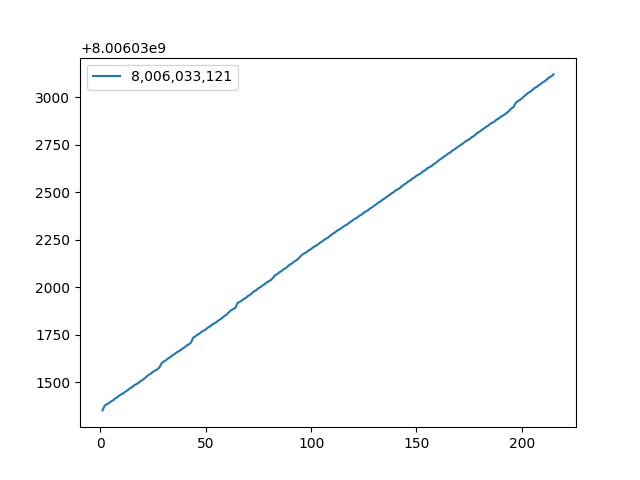

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
fig, ax = plt.subplots(1, 1)

x=[]
y=[]

i=0

while (True): 
    ax.cla()     # limpiar plot para actualizacion
    i=i+1

    x.append(float(i))
    
    url = "https://countrymeters.info/en/World"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.select('td div[id="cp1"]')
    current_pop_n = re.findall(r'>(.+)<',str(info[0]))[0]
    current_pop = int(current_pop_n.replace(',','')) 

    y.append(current_pop)


    
    ax.plot(x,y,label=current_pop_n)    # plot del ajuste
    plt.legend()

    fig.canvas.draw() # actualizacion del plot
    time.sleep(0.01)   # esperar 1 segundo